<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" integrity="sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO" crossorigin="anonymous">

<div class="container-fluid text-center">
    <div class="row">
        <div class="col">
            <img src="img/usmlogo.png" style="width:100px;float:left" class="d-inline-block">
        </div>
        <div class="col" class="d-inline">
            <h1>Laboratorio 4 Estadística Computacional</h1>
            Giorgio Pellizzari - 201473599-5 - Malla Nueva<br>
            Felipe Vega - 201473511-1 - Malla Nueva<br>
            9 de abril del 2018<br>
        </div>
        <div class="col mr-auto">
            <img src="img/dilogo.png" style="width:60px;float:right;" class="d-inline-block mb-5">
        </div>
    </div>
</div>



In [54]:
from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
from scipy import stats, special
import statsmodels.api as sm
import math
import seaborn as sns
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#import warnings
#warnings.filterwarnings('ignore')

# Análisis Exploratorio

Se realiza análisis exploratorio del dataset "student-por.csv", el cual consiste en datos recopilados de los alumnos de dos escuelas de portugués.

A partir de este dataset se estudiará la relación que hay entre el rendimiento del estudiante y el entorno en el que se desempeña. Para facilitar el analisis se generará un sub-dataset que contendrá solo la información que sea mas relevante para el análisis.

In [55]:
dataset = pd.read_csv('student-por.csv',sep=";",usecols=["school","address","G3"])


#porSchool.boxplot(column="G2")
#plt.show()


Se comenzará analizando el rendimiento del alumno según la escuela en la que estudia.

In [56]:
subdataset = dataset[["school","address","G3"]].query('school == "GP"')
gp=len(subdataset)
promediogp=subdataset["G3"].sum()/gp 
print (promediogp)

subdataset1 = dataset[["school","address","G3"]].query('school == "MS"')
ms=len(subdataset1)
promedioms=subdataset1["G3"].sum()/ms


print (promedioms)


12.576832151300236
10.650442477876107


Se logra observar que los alumnos de la escuela Mousinho da Silveira tienen menor rendimiento promedio (10,65) que los alumnos de la escuela Gabriel Pereira (12,57).

Se realiza un boxplot separando según escuela.

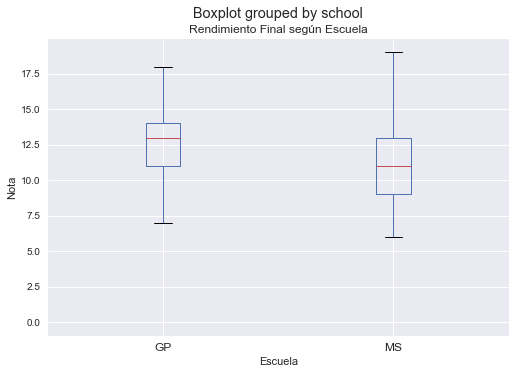

In [57]:
plt.figure(figsize=(6, 20))
dataset[["school","G3"]].boxplot(by="school")
plt.title('Rendimiento Final según Escuela' + str())
plt.ylabel('Nota')
plt.xlabel("Escuela")
plt.show() 

Se logra observar que la escuela Gabriel Pereira tiene una mayor mediana de datos. La presencia de más outliers en el caso de la escuela Gabriel Pereira indica que existe una mayor cantidad de alumnos con menor rendimiento que el resto, lo cual no afecta en gran medida al rendimiento promedio frente a la otra escuela que posee menos outliers inferiores y su bigote superior abarca notas mayores a las del bigote superior de la escuela Gabriel Pereira. Aún así, los promedios de la escuela Gabriel Pereira se ven acumulados en notas más altas que los de la otra escuela.

Se procede a analizar el rendimiento del alumno según su localidad (address), para esto se realiza el mismo analisis hecho previamente.

In [58]:
subdataset2 = dataset[["school","address","G3"]].query('address == "U"')
U=len(subdataset2)
promedioU=subdataset2["G3"].sum()/U
print (promedioU)

subdataset3 = dataset[["school","address","G3"]].query('address == "R"')
R=len(subdataset3)
promedioR=subdataset3["G3"].sum()/R


print (promedioR)

12.263274336283185
11.086294416243655


Los alumnos que viven es localidades urbanas poseen un promedio de rendimiento de 12,26 mientras que los alumnos de localidad rural poseen un rendimiento promedio de 11.09, lo cual no es una diferencia tan significativa dado el rango de notas.

Se realiza un boxplot para comparar ambas localidades.

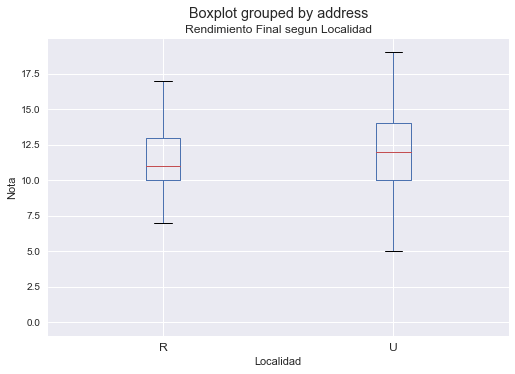

In [59]:
plt.figure(figsize=(6, 20))
dataset[["address","G3"]].boxplot(by="address")
plt.title('Rendimiento Final segun Localidad' + str())
plt.ylabel('Nota')
plt.xlabel("Localidad")
plt.show()  

En este caso, a diferencia de lo presentado en las distintas escuelas, el rendimiento del alumno no se ve fuertemente afectado por su localidad o address. En el caso de los rurales, se presenta que la mayoria de los datos están más acumulados dado que el tamaño de sus bigotes y caja son menores, tanto inferiores como superiores, presentando outliers en ambos sentidos. En cambio, los urbanos presenta menos acumulación de datos, teniendo una mediana levemente superior a los rurales pero no significativa y presentando bigotes de mayor rango. Se presentan ademas mayor cantidad de outliers inferiores en zona urbana, lo cual no entrega mayor información.

Se puede además, realizar el mismo estudio según el acceso a internet que tiene el alumno.

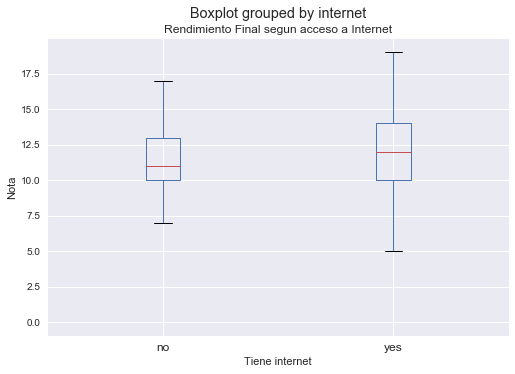

In [60]:
internet = pd.read_csv('student-por.csv',sep=";",usecols=["internet","G3"])
plt.figure(figsize=(6, 20))
internet.boxplot(by="internet")
plt.title('Rendimiento Final segun acceso a Internet' + str())
plt.ylabel('Nota')
plt.xlabel("Tiene internet")
plt.show()  

Se logra observar que los bigotes en el caso de los que tienen internet son más amplios que en caso de los que no tienen internet, dando la idea de que la presencia de internet puede ser tanto beneficiosa como no serlo para el alumno. En ambos casos se presenta outliers inferiores pero en el caso de no tener internet, también se presentan outliers superiores, los cuales están dentro del rango de los bigotes superiores del caso de si tener internet. Esto indica que es más frecuente tener casos de mejor rendimiento en caso de tener internet.

Finalmente analizaremos los promedios de los alumnos según su uso de internet.

In [61]:
subdataset4 = internet.query('internet == "yes"')
S=len(subdataset4)
promedioS=subdataset4["G3"].sum()/S
print (promedioS)

subdataset5 = internet.query('internet == "no"')
N=len(subdataset5)
promedioN=subdataset5["G3"].sum()/N


print (promedioN)

12.17269076305221
11.026490066225165


En este caso, los alumnos con internet tiene un promedio igual a 12.17, mientras que los alumnos sin internet tienen un promedio de 11.03, por lo que se puede concluir  que los alumnos con internet tienen mejor rendimiento promedio que los alumnos sin internet.

# Intervalos de Confianza y Método Bootstrap 

Se implementa el método Bootstrap obteniendo un conjunto de 1000 estimadores para la media de las edades.

In [62]:
ages = pd.read_csv('muestra_edad.csv')
ages = ages['x']
n = ages.size


poblacionDeMedias = []
for i in range(1000):
    resamples = []
    for i in range(n):
        papelito = np.random.choice(ages)
        resamples.append(papelito)
    resamples = np.asarray(resamples)
    media = np.mean(resamples)
    poblacionDeMedias.append(media)
   


Luego, se ordena el conjunto de estadísticos. Para construir el intervalo de confianza se considerará un uppertail y un lowertail de $\frac{\alpha}{2}$ en cada intervalo. Para encontrar estos puntos se utilizan los percentiles del conjunto.

In [63]:

poblacionDeMedias.sort()

lower90 = np.percentile(poblacionDeMedias,0.05)
upper90 = np.percentile(poblacionDeMedias,0.95)

i90 = [lower90, upper90]

lower95 = np.percentile(poblacionDeMedias,0.025)
upper95 = np.percentile(poblacionDeMedias,0.975)

i95 = [lower95, upper95]

lower99 = np.percentile(poblacionDeMedias,0.005)
upper99 = np.percentile(poblacionDeMedias,0.995)

i99 = [lower99, upper99]

print("IC 90%: "+str(i90))
print("IC 95%: "+str(i95))
print("IC 99%: "+str(i99))

IC 90%: [16.54130769230769, 16.56980056980057]
IC 95%: [16.539884615384615, 16.56980056980057]
IC 99%: [16.538746153846155, 16.56980056980057]


De esta manera de obtienen los siguientes intervalos de confianza.

$$IC 90\%: [16.538455840455839, 16.579745014245013]$$
$$IC 95\%: [16.535609686609686, 16.580456552706554]$$
$$IC 99\%: [16.533332763532762, 16.581025783475784]$$

Ahora utilizando el método Bootstrap se obtienen intervalos de confianza para la mediana de las edades. Se utilizan los mismos parámetros que en el caso de la media de las edades.



In [64]:
poblacionDeMedianas = []
for i in range(1000):
    resamplesM = []
    for i in range(n):
        papelito = np.random.choice(ages)
        resamplesM.append(papelito)
    resamplesM = np.asarray(resamplesM)
    median = np.median(resamplesM)
    poblacionDeMedianas.append(median)
    
poblacionDeMedianas.sort()   

lowerM90 = np.percentile(poblacionDeMedianas,0.05)
upperM90 = np.percentile(poblacionDeMedianas,0.95)

iM90 = [lowerM90, upperM90]

lowerM95 = np.percentile(poblacionDeMedianas,0.025)
upperM95 = np.percentile(poblacionDeMedianas,0.975)

iM95 = [lowerM95, upperM95]

lowerM99 = np.percentile(poblacionDeMedianas,0.005)
upperM99 = np.percentile(poblacionDeMedianas,0.995)

iM99 = [lowerM99, upperM99]

print("IC 90%: "+str(iM90))
print("IC 95%: "+str(iM95))
print("IC 99%: "+str(iM99))

IC 90%: [16.0, 16.490499999999997]
IC 95%: [16.0, 16.74025]
IC 99%: [16.0, 16.940049999999999]


Se obtienen los siguientes intervalos de confianza.

$$IC 90\%: [16.0, 17.0]$$
$$IC 95\%: [16.0, 17.0]$$
$$IC 99\%: [16.0, 17.0]$$

#  Contraste de Hipótesis

Un Contraste de Hipótesis es un procedimiento para decidir si una afirmación se encuentra apoyada por evidencia experimental. En estos procedimiento se cuenta con una hipótesis nula $(H_0)$ y una hipótesis alternativa $(H_1)$. La hipótesis nula se puede rechazar o no, donde se hace la analogía de que la hipótesis nula es inocente (verdadera) hasta que no se pruebe lo contrario.

En este caso se cuenta con dos poblaciones, una de estudiantes aprobados y una de estudiantes reprobados, ambos provenientes de la escuela Gabriel Pereira. El estudio deseado es determinar si la proporción de aprobados y reprobados es la misma, para esto se considera una variable $X$ como una variable aleatoria de Bernoulli que toma el valor 1 cuando el alumno reprueba y 0 si el alumno aprueba. Como es sabido $E[x] = p$ y $Var[X] = p(1 - p)$, por lo que $p$ se puede estimar como el promedio de $X$. Luego, por el TLC, para $n$ muy grande el estimador sigue una distribución normal $\hat{p} = \bar{p} \approx N(p, \frac{p(1 - p)}{n})$.

De esta manera se construye el siguiente Test de Hipótesis.

$$ H_0: p = p_0$$
$$ H_1: p \neq p_0$$

Donde el estadístico está dado por la siguiente expresión, la cual es válida bajo $H_0$ verdadero.

$$ Z = \frac{\hat{p} - p}{\sqrt{\frac{p(1 - p)}{x}}} \rightarrow \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{x}}} \sim N(0, 1)$$

El cual se rechaza si $Z < z_{(1 - \frac{\alpha}{2})}$ ó $ Z > z_{(\frac{\alpha}{2})} $.

En este caso, como se quiere comprobar si la proporción de reprobados es igual a la de aprobados las hipótesis quedan de la siguiente forma.

$$ H_0: p = 0.5$$
$$ H_1: p \neq 0.5$$

Se calcula $\hat{p}$, el estadístico de contraste y los puntos $ z_{(1 - \frac{\alpha}{2})}$ y $z_{(\frac{\alpha}{2})}$.

In [65]:
datosEstudiantes = pd.read_csv('student-por.csv',sep=";")
reprobadosGP = datosEstudiantes[['G3','school']].query('G3 < 11 and school=="GP"')
aprobadosGP = datosEstudiantes[['G3','school']].query('G3 >= 11 and school=="GP"')

alpha = 0.5
n = (reprobadosGP['G3'].size + aprobadosGP['G3'].size)
propor = reprobadosGP['G3'].size/n

stadisticoContraste = (propor - 0.5)/(((0.5*(1 - 0.5)/n))**(1/2))
zPoints = stats.norm.interval(alpha/2)
infZ, supZ = zPoints
print(stadisticoContraste <= infZ)
print(stadisticoContraste >= supZ)
print(stadisticoContraste)

True
False
-12.301280949655775


Como el estadístico de contraste $Z \approx -12.30 $ es menor que $ z_{(1 - \frac{\alpha}{2})} $, se rechaza $H_0$ con certeza de $95\%$, por lo tanto, la proporción entre aprobados y reprobados no es igual.

Se calcula el p-value del contraste realizado, el cual es de $4.5 \cdot 10^{-35}$, por lo que la probabilidad de rechazar y estar equivocado es muy baja, por lo que hay muy pocas probabilidades de caer en este caso.

In [66]:
pValue = stats.norm.cdf(stadisticoContraste)
print("p-value: " + str(pValue))

p-value: 4.45745133756e-35


# Regresión Lineal 

a) Se utiliza la libreria seaborn para visualizar la relación entre el promedio de las columnas G1 y G2 con la columna G3 del dataset "student-por.csv".


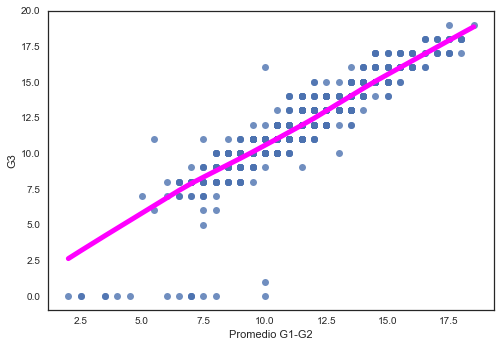

In [67]:
students = pd.read_csv("student-por.csv",sep=";", usecols=["G1","G2","G3"])
sns.set_style("white")
x=np.arange(0,len(students))
y1=students["G1"]
y2=students["G2"]
# Variable promedio
y3 = (students["G1"] + students["G2"])/2
# Variable Dependiente
y4 = students["G3"]

'''
sns.regplot(x,y2,lowess=True, line_kws={"color":"magenta", "linewidth":5})
plt.title('Notas Primer periodo' + str())
plt.ylabel('Nota')
plt.xlabel("G1")
plt.show()

sns.regplot(x,y1,lowess=True, line_kws={"color":"green", "linewidth":5})
plt.title('Notas segundo periodo' + str())
plt.ylabel('Nota')
plt.xlabel("G2")
plt.show()
'''
sns.regplot(y3,y4,lowess=True,line_kws={"color":"magenta", "linewidth":5})
plt.xlabel("Promedio G1-G2")
plt.show()



Se logra observar en el gráfico que el promedio de los primeros períodos se comporta similar a la nota final obtenida, mostrando una relación lineal entre las variables analizadas, a pesar de los puntos alejados del gráfico. Esto indica que es probable que exista una relación lineal entre las variables. 


b) Se realizan boxplots para las variables involucradas en la regresión.

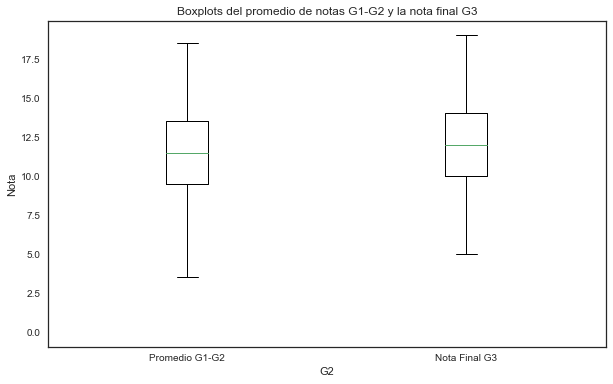

In [68]:
#plt.figure(figsize=(10, 6))
#plt.boxplot(students["G1"])
#plt.title('Notas primer periodo' + str())
#plt.ylabel('Nota')
#plt.xlabel("G1")
#plt.show()  
#plt.figure(figsize=(10, 6))
#plt.boxplot(students["G2"])
#plt.title('Notas segundo periodo' + str())
#plt.ylabel('Nota')
#plt.xlabel("G2")
#plt.show()  
plt.figure(figsize=(10, 6))
plt.boxplot([y3,y4])
plt.title("Boxplots del promedio de notas G1-G2 y la nota final G3")
plt.ylabel('Nota')
plt.xlabel("G2")
plt.xticks([1,2],["Promedio G1-G2","Nota Final G3"])
plt.show()  

Se logra observar en ambos boxplot que la mediana (Q2) se presenta dentro del rango de los 10 y los 12.5. Se puede observar que no hay diferencia significativa entre las dos muestras, dado que las cajas se sobreponen entre si. Dado lo anterior, se esperaría que al construir el modelo de regresión lineal $\beta_1$ fuera muy cercano a 1 y $\beta_0$ muy cercano a 0.

c)Se grafica la curva de densidad para cada periodo incluyendo el valor de asimetría:

La asimetria para el promedio entre G1 y G2 es: -0.014090732647023055


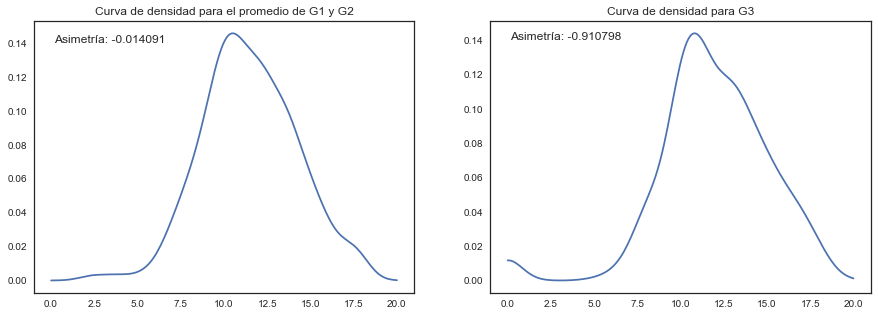

La asimetria para G3 es: -0.9107980386425641


In [69]:
from scipy.stats import gaussian_kde,skew

fig = plt.figure(figsize=(15,5))

# Primer Gráfico de Densidad
density1 = gaussian_kde(y3)
xs = np.linspace(0,20,200)
density1.covariance_factor = lambda : .25
density1._compute_covariance()
plt.subplot(121)
plt.plot(xs,density1(xs))
plt.title('Curva de densidad para el promedio de G1 y G2' + str())
plt.text(0.14,0.14,"Asimetría: "+ str(np.round(skew(y3),6)))
print( 'La asimetria para el promedio entre G1 y G2 es: {}'.format( skew(y3) ))

# Segundo Gráfico
density2 = gaussian_kde(y4)
xs = np.linspace(0,20,200)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.subplot(122)
plt.plot(xs,density2(xs))
plt.text(0.14,0.14,"Asimetría: "+ str(np.round(skew(y4),6)))
#plt.plot([y4.mean(),y4.mean(),y4.mean(),y4.mean()],[0, 0.05, 0.10, 0.15])
#plt.plot([y4.median(),y4.median(),y4.median(),y4.median()],[0, 0.05, 0.10, 0.15])
plt.title('Curva de densidad para G3' + str())
plt.show()
print( 'La asimetria para G3 es: {}'.format( skew(y4) ))

Se logra observar que la asimetría para ambos periodos es negativa, lo cual indica que las notas esta cargadas mas hacia la izquierda de la curva. Se logra observar además que el comportamiento de ambas curvas es similar, presentando una mayor densidad de datos nuevamente entre 10 y 12.5.

d) Se calcula la correlacion entre G1 y G2:

In [70]:
#print (np.corrcoef(y1,y2))
print(np.corrcoef(y3,y4))

[[ 1.          0.90488844]
 [ 0.90488844  1.        ]]


De esto se obtiene que la correlación es 0.90488844, lo cual es un buen indicador de la similitud entre ambos periodos y presenta concordancia con lo analizado previamente en esta sección sobre las relaciones que existen entre ambos periodos. Además, como la correlación es positiva, se puede determinar que a medida que una variable aumenta la otra también aumenta y viceversa.

e) Utilizando la librería "sklearn", se construye un modelo de regresión lineal, utilizando el promedio de G1 y G2 como variable independiente y G3 como variable dependiente.


In [71]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
y4 = students["G3"]

lm.fit(y3.values.reshape(-1,1),y4.values.reshape(-1,1))

prediccion = lm.predict(y3.values.reshape(-1,1))
beta1 = lm.coef_[0][0]
print("Beta 1: \n",beta1)
print("Beta 0: \n", lm.intercept_[0])

Beta 1: 
 1.06991007599
Beta 0: 
 -0.381471111505


De esta manera, el modelo resultan es el siguiente

$$ \hat{y_i} = \hat{\beta_1}\cdot x_{i} + \beta_{0}$$
$$ \hat{y_i} = 1.06991007599 \cdot x_{i} - 0.381471111505$$

Tal como se esperaba en la pregunta $\textbf{b)}$, $\hat{\beta_1} \sim 1$ y $\hat{\beta_0} \sim 0$.

f) Se calcula el coeficiente de determinación se la siguiente manera

$$ R^2 = 1 - \frac{SSE}{SST}$$

Para esto se calcula todos los $\hat{y_i}$, para luego calcular la suma de los cuadrados de los residuos. Como también es necesario $SST$, se calcula $\sum(y_i - \bar{y})^2$.

In [72]:
pred = pd.DataFrame(prediccion)
y_mean = y4.mean()
s_yy = ((y4 - y_mean)**2).sum()
SSE_vector = ((y4 - pred[0])**2)
r2mano = 1-(SSE_vector.sum()/s_yy)
print(r2mano)

0.8188230930224782


Se obtiene un coeficiente de determinación $R^2 \approx 0.82$, esto indica que un $82\%$ de la variable dependiente se debe al valor de la variable independiente. 

g) Además, debido a que es mayor que $0.7$ (valor heurístico frecuentemente usado) el ajuste realizado es de buena calidad. Esto debido a que un $82\%$ del valor de la variable dependiente está directamente relacionado con el valor de la variable independiente.

i) Se realiza un Contraste de Hipótesis para comprobar si existe relación, en este caso lineal, entre las variables.

Sea 
$$ H_0: \beta_1 = 0 $$
$$ H_1: \beta_1 \neq  0 $$

Donde $H_0$ se rechaza si $t < t_{(1 - \frac{\alpha}{2}, n - 2)}$ ó $t > t_{(\frac{\alpha}{2}, n - 2)}$

Se debe construir un estadístico que siga una determinada distribución cuando se cumple $H_0$, en este caso $t = \frac{\hat{\beta_1} - 0}{\frac{\hat{\sigma}}{\sqrt{S_xx}}}$ sigue una distribución $T$ con $n - 2$ grados de libertad.

De esta manera se calcula un estimador para $\sigma$, además del estadístico necesario y los valores de la distribución T necesarios. Además se utiliza un nivel de significancia de $0.05$.

In [73]:


gradosDeLibertad = SSE_vector.size - 2
s_quare = SSE_vector.sum()/gradosDeLibertad
x_mean = y3.mean()
s_xx = ((y3 - x_mean)**2).sum()
stadistic = beta1/((s_quare/s_xx)**(1/2))

tValues = stats.t.interval(0.95/2,gradosDeLibertad)

t1MenosAlphaMedios, tAlphaMedios = tValues
print("Estadístico: "+ str(stadistic))
# Comprobar si se encuentra en región Crítica
print(stadistic < t1MenosAlphaMedios)
print(stadistic > tAlphaMedios)



Estadístico: 54.0749044809
False
True


Como $t = 54.0749044809 > t_{(\frac{0.05}{2}, n - 2)}$ se rechaza $H_0$ con un $95\%$ de certeza, por lo que si existe relación lineal entre las variables.

También, se calcula el p-valor del contraste, el cual tiene un valor de $3.2 \cdot 10^{-238}$, por lo que el contraste realizado es de gran calidad y la probabilidad de rechazar incorrectamente es practicamente 0.

In [74]:
stats.t.cdf(1 - stadistic, gradosDeLibertad)

3.2834727907480367e-238

j) Considerando

$$IC = \left[ \hat{Y}_{x_{0}}\pm T_{\alpha /2,n-2}\hat{\sigma}\sqrt{1+\frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{S_{xx}}} \right]$$
$$S_{xx} = \sum_{i=1}^{n}(x_{i}-\bar{x})^2$$

Se construyen tres intervalos de confianza para la respuesta real de $y$ cuando $x_0 = 11$.

$$90\% = [10.563885557855732, 12.211193890841331] $$
$$95\% = [10.511651574079075, 12.263427874617989] $$
$$99\% = [10.468940430354284, 12.30613901834278] $$

In [75]:
# Valores t-student
no, tValues90alphaMedios = stats.t.interval(0.90/2, gradosDeLibertad)
no, tValues95alphaMedios = stats.t.interval(0.95/2, gradosDeLibertad)
no, tValues99alphaMedios = stats.t.interval(0.99/2, gradosDeLibertad)

vPredic = lm.predict(np.array(11).reshape(-1,1))[0][0]

IC90inf = vPredic - tValues90alphaMedios*((s_quare)**(1/2))*((1 + (1/SSE_vector.size) + ((11-y3.mean())/s_xx))**(1/2))
IC90sup = vPredic + tValues90alphaMedios*((s_quare)**(1/2))*((1 + (1/SSE_vector.size) + ((11-y3.mean())/s_xx))**(1/2))
IC90 = [IC90inf, IC90sup]

IC95inf = vPredic - tValues95alphaMedios*((s_quare)**(1/2))*((1 + (1/SSE_vector.size) + ((11-y3.mean())/s_xx))**(1/2))
IC95sup = vPredic + tValues95alphaMedios*((s_quare)**(1/2))*((1 + (1/SSE_vector.size) + ((11-y3.mean())/s_xx))**(1/2))
IC95 = [IC95inf, IC95sup]

IC99inf = vPredic - tValues99alphaMedios*((s_quare)**(1/2))*((1 + (1/SSE_vector.size) + ((11-y3.mean())/s_xx))**(1/2))
IC99sup = vPredic + tValues99alphaMedios*((s_quare)**(1/2))*((1 + (1/SSE_vector.size) + ((11-y3.mean())/s_xx))**(1/2))
IC99 = [IC99inf, IC99sup]

print("Intervalo de confianza con 90% de certeza: "+ str(IC90))
print("Intervalo de confianza con 95% de certeza: "+ str(IC95))
print("Intervalo de confianza con 99% de certeza: "+ str(IC99))

Intervalo de confianza con 90% de certeza: [10.563885557855732, 12.211193890841331]
Intervalo de confianza con 95% de certeza: [10.511651574079075, 12.263427874617989]
Intervalo de confianza con 99% de certeza: [10.468940430354284, 12.30613901834278]


Se puede observar que todos los intervalos incluyen el valor 11. Además, a medida que aumenta la certeza sobre el intervalo aumenta el largo de este, lo cual tiene mucho sentido dado que si uno quiere estar más seguro de algo aumenta su rango de posibilidades.